Credit goes to Ruben Winastwan for the code and tutorial: ["Text Generation with GPT: How to fine-tune a GPT model to generate a TED description-like text"](https://towardsdatascience.com/text-generation-with-gpt-092db8205cad).

In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
from transformers import GPT2Tokenizer, GPT2Config, GPT2Model, GPT2PreTrainedModel
from torch.optim import AdamW
from tqdm import tqdm
from torch.nn import functional as F
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_built() else 'cpu'

In [2]:
reviews = pd.read_pickle("../data/user_review.pkl")

In [3]:
text_corpus = [f"{txt} <|endoftext|>" for i, txt in enumerate(reviews["Comment"]) if txt != '']

In [4]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', pad_token='<|pad|>')

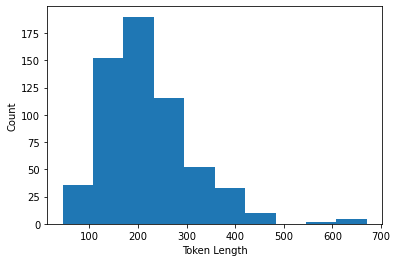

In [5]:
tokenized_inp_len = [len(tokenizer(txt)['input_ids']) for txt in text_corpus]

np.random.seed(42)
x = np.asarray(tokenized_inp_len)

plt.hist(x, density=False, bins=10)  
plt.ylabel('Count')
plt.xlabel('Token Length')
plt.show()